In [1]:
import pandas as pd

cme_data = pd.read_csv('../data/cme/cme_1h.csv', usecols=['Entry Date UTC', 'Price'])
cme_data['Entry Date UTC'] = pd.to_datetime(cme_data['Entry Date UTC'], format='%Y%m%dT%H:%M:%S')

steth_data = pd.read_csv('../data/steth/steth_1h.csv', usecols=['Entry Date UTC', 'Price'])
steth_data['Entry Date UTC'] = pd.to_datetime(steth_data['Entry Date UTC'])

# Merge the two datasets on 'Entry Date UTC'
dataset = pd.merge(cme_data, steth_data, on='Entry Date UTC', suffixes=('_cme', '_steth'))

# Display the first few rows to confirm the merge
print(dataset.head())


       Entry Date UTC  Price_cme  Price_steth
0 2022-01-02 23:00:00     3822.5      3818.02
1 2022-01-03 00:00:00     3838.0      3818.02
2 2022-01-03 01:00:00     3812.0      3791.57
3 2022-01-03 02:00:00     3812.5      3796.46
4 2022-01-03 03:00:00     3807.5      3787.55


In [2]:
from sklearn.model_selection import train_test_split

X = dataset[['Price_cme']].values
y = dataset['Price_steth'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

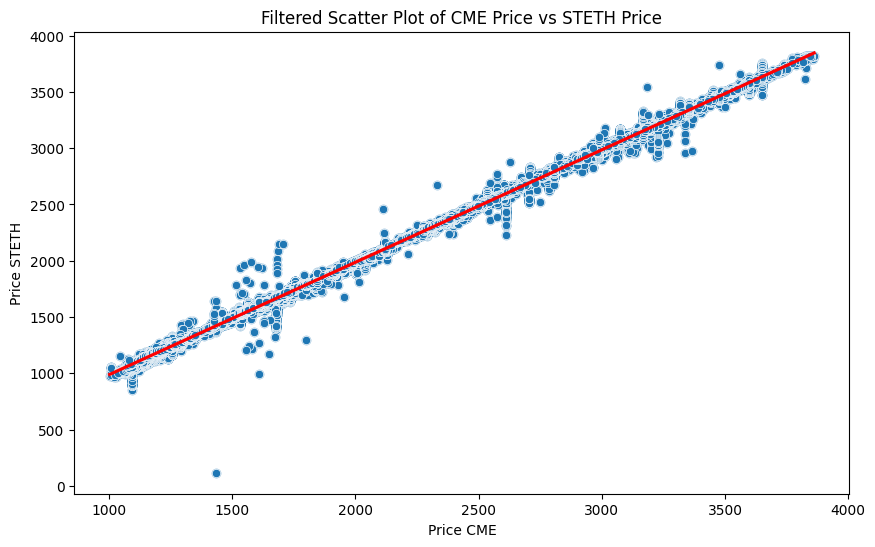

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame

# Calculate the 99th percentile
upper_limit = dataset['Price_steth'].quantile(0.99)

# Filter the dataset to remove extreme outliers
filtered_dataset = dataset[dataset['Price_steth'] <= upper_limit]

# Set the size of the plot
plt.figure(figsize=(10, 6))  # Width and height in inches

# Plotting the filtered dataset with a regression line
sns.regplot(x='Price_cme', y='Price_steth', data=filtered_dataset, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

# Plotting the filtered dataset
sns.scatterplot(x='Price_cme', y='Price_steth', data=filtered_dataset)
plt.title('Filtered Scatter Plot of CME Price vs STETH Price')
plt.xlabel('Price CME')
plt.ylabel('Price STETH')
plt.show()
